This notebook makes the latex table for the SNeHa sample

In [1]:
#import packages and formatting statements

import numpy as np
from matplotlib import pyplot as plt
import astropy.io.fits as pyfits
from astropy.table import Table, join
from astropy.wcs import WCS
from astropy.io import ascii
import os

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Compile galaxy and OSC objects

dataFile = '../Data/2.MUSEMasterCat.csv'
data = Table.read(dataFile, format = "csv")

data[0:2]


Galaxy,Distance,Incl,Supernova,Type,Ra,Dec,MUSERes,MUSENatMap,MUSE150pcMap,MUSEHII,IRACfiles,Intensity,coptMap,CO21,eCO21,InSample
str7,float64,float64,str11,str12,float64,float64,float64,str71,str70,str50,str40,float64,str58,str72,str73,str5
NGC0628,9.84,8.9,SN2013ej,II,24.200666666666667,15.758611111111112,0.92,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_Nat/NGC0628-0.92asec_MAPS.fits,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_150pc/NGC0628-150pc_MAPS.fits,../Data/HII_reg_masks/NGC0628_nebulae_mask_V2.fits,../Data/IRAC/ngc0628_irac1_atGauss4.fits,nan,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC0628_sfr.fits,../../GalaxyFiles/ALMACO2-1/ngc0628_12m+7m+tp_co21_150pc_broad_mom0.fits,../../GalaxyFiles/ALMACO2-1/ngc0628_12m+7m+tp_co21_150pc_broad_emom0.fits,False
NGC0628,9.84,8.9,SN2019krl,IIn/LBV,24.2067875,15.77946388888889,0.92,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_Nat/NGC0628-0.92asec_MAPS.fits,../../GalaxyFiles/MUSELargeFiles/MUSE2.2_150pc/NGC0628-150pc_MAPS.fits,../Data/HII_reg_masks/NGC0628_nebulae_mask_V2.fits,../Data/IRAC/ngc0628_irac1_atGauss4.fits,5.692852417108771e+38,../../GalaxyFiles/MUSELargeFiles/SFR/copt/NGC0628_sfr.fits,../../GalaxyFiles/ALMACO2-1/ngc0628_12m+7m+tp_co21_150pc_broad_mom0.fits,../../GalaxyFiles/ALMACO2-1/ngc0628_12m+7m+tp_co21_150pc_broad_emom0.fits,False


In [3]:
# Compile intensities
intsFile = '../Data/2.Intensities.csv'
ints = Table.read(intsFile, format = "csv")

ints[0:2]


Supernova,Type,Int_native,Int_150,Int_1kpc
str11,str12,float64,float64,float64
SN2013ej,II,nan,nan,nan
SN2019krl,IIn/LBV,447.33069091690675,117.73639895611818,119.62957869932427


In [9]:
# make Table for Latex Table
ra   = [float(x) for x in data["Ra"]]
ra   = [round(x,4) for x in ra]
dec  = [float(x) for x in data["Dec"]]
dec  = [round(x,4) for x in dec]
# int150  = [float(x) for x in data["MUSE150pcInt"]]
# int150  = [round(x,0) for x in int150]
int_nat  = [float(x) for x in ints["Int_native"]]
int_nat  = [round(x,0) for x in int_nat]

inSample, inESO, inMUSE, paper = [],[],[],[]
for i in range(len(data["InSample"])):
    paper.append("?")
    if data["InSample"][i] == "True":
        inSample.append("\checkmark")
    else: 
        inSample.append("-")      

texTable = Table({"Galaxy"    : data["Galaxy"],
                  "Supernova" : data["Supernova"],
                  "Type"      : data["Type"],
                  "Ra"        : ra,
                  "Dec"       : dec,
                  "In Sample" : inSample,
                  "Intensity": int_nat,
                  "Resolution": data["MUSERes"],
                  "Reference" : paper})

In [10]:
ascii.write(texTable, '../Data/2.SNeHaMaster.tex', format='latex', fast_writer=False, overwrite = True)  

[Text(0.5, 1.0, 'Intensity Values')]

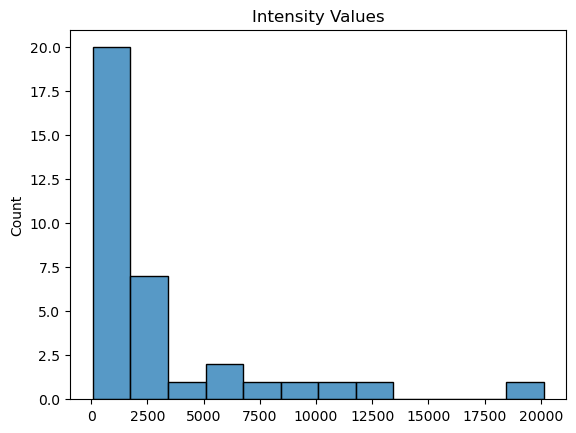

In [11]:
import seaborn as sns

sns.histplot(int_nat).set(title = "Intensity Values")